# Téléchargement et exploration de la dataset

In [1]:
# chemin jusqu'à la dataset
base_dir = 'flowers'

In [3]:
#visualisation des éléments 
import os
classes = os.listdir(base_dir)
print(f'Number of classes : {len(classes)}')
print(f'Classes : {classes}')

Number of classes : 5
Classes : ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


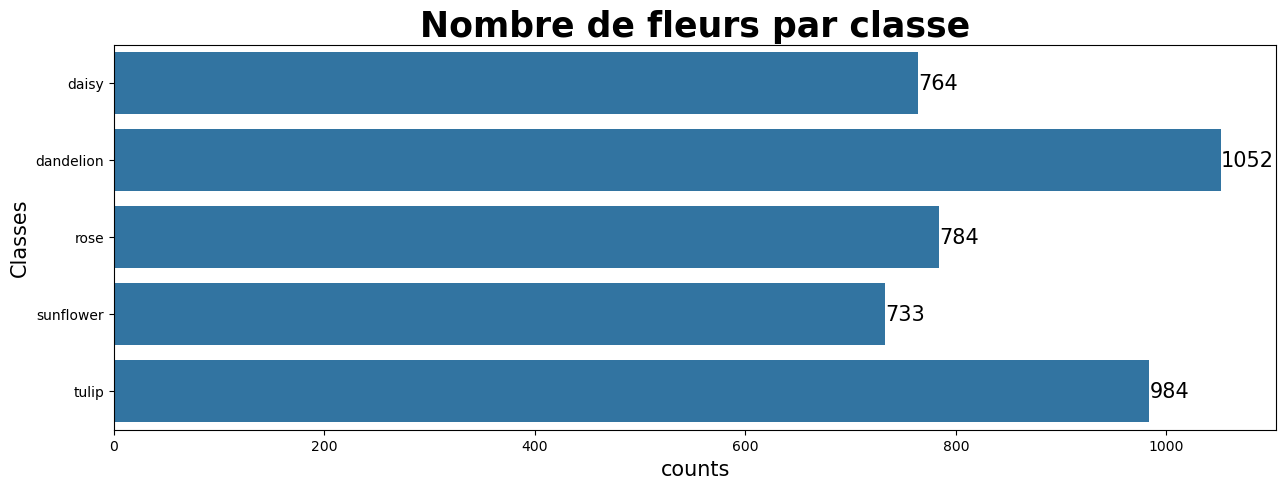

In [5]:
import matplotlib.pyplot as plt  # Importation de la bibliothèque Matplotlib pour générer des graphiques.
import seaborn as sns  # Importation de la bibliothèque Seaborn pour simplifier la création de visualisations statistiques.
 
counts = []  # Initialisation d'une liste vide qui contiendra le nombre d'éléments dans chaque classe.
 
for class_name in classes:  # Boucle à travers chaque nom de classe dans la liste 'classes'.
    counts.append(len(os.listdir(os.path.join(base_dir, class_name))))  # Compte le nombre de fichiers dans chaque répertoire de classe et ajoute ce nombre à la liste 'counts'.
 
# Plot the result  
plt.figure(figsize=(15, 5))  # Crée une nouvelle figure avec une taille de 15 par 5 pouces.
ax = sns.barplot(x=counts, y=classes)  # Génère un graphique en barres avec les 'counts' sur l'axe des x et les 'classes' sur l'axe des y.
ax.bar_label(ax.containers[0], fontsize=15)  # Ajoute des étiquettes de valeurs sur les barres du graphique avec une taille de police de 15.
plt.title('Nombre de fleurs par classe', fontsize=25, fontweight='bold')  # Ajoute un titre au graphique avec une police de taille 25 en gras.
plt.xlabel('counts', fontsize=15)  # Définit le label de l'axe des x avec le texte 'counts' et une taille de police de 15.
plt.ylabel('Classes', fontsize=15)  # Définit le label de l'axe des y avec le texte 'Classes' et une taille de police de 15.
plt.show()  # Affiche le graphique.


In [7]:
from termcolor import colored  # Importation de la fonction 'colored' de la bibliothèque 'termcolor' pour colorer le texte dans la console.
from datetime import datetime  # Importation du module 'datetime' pour manipuler les dates et heures.

print(colored(f'Nombre de tous les échantillons : {sum(counts)}', attrs=['bold']))  # Affiche le texte en couleur dans la console. Le texte contient le nombre total d'échantillons, qui est la somme de la liste 'counts'. Le texte est affiché en gras grâce à l'attribut 'bold'.


Nombre de tous les échantillons : 4317


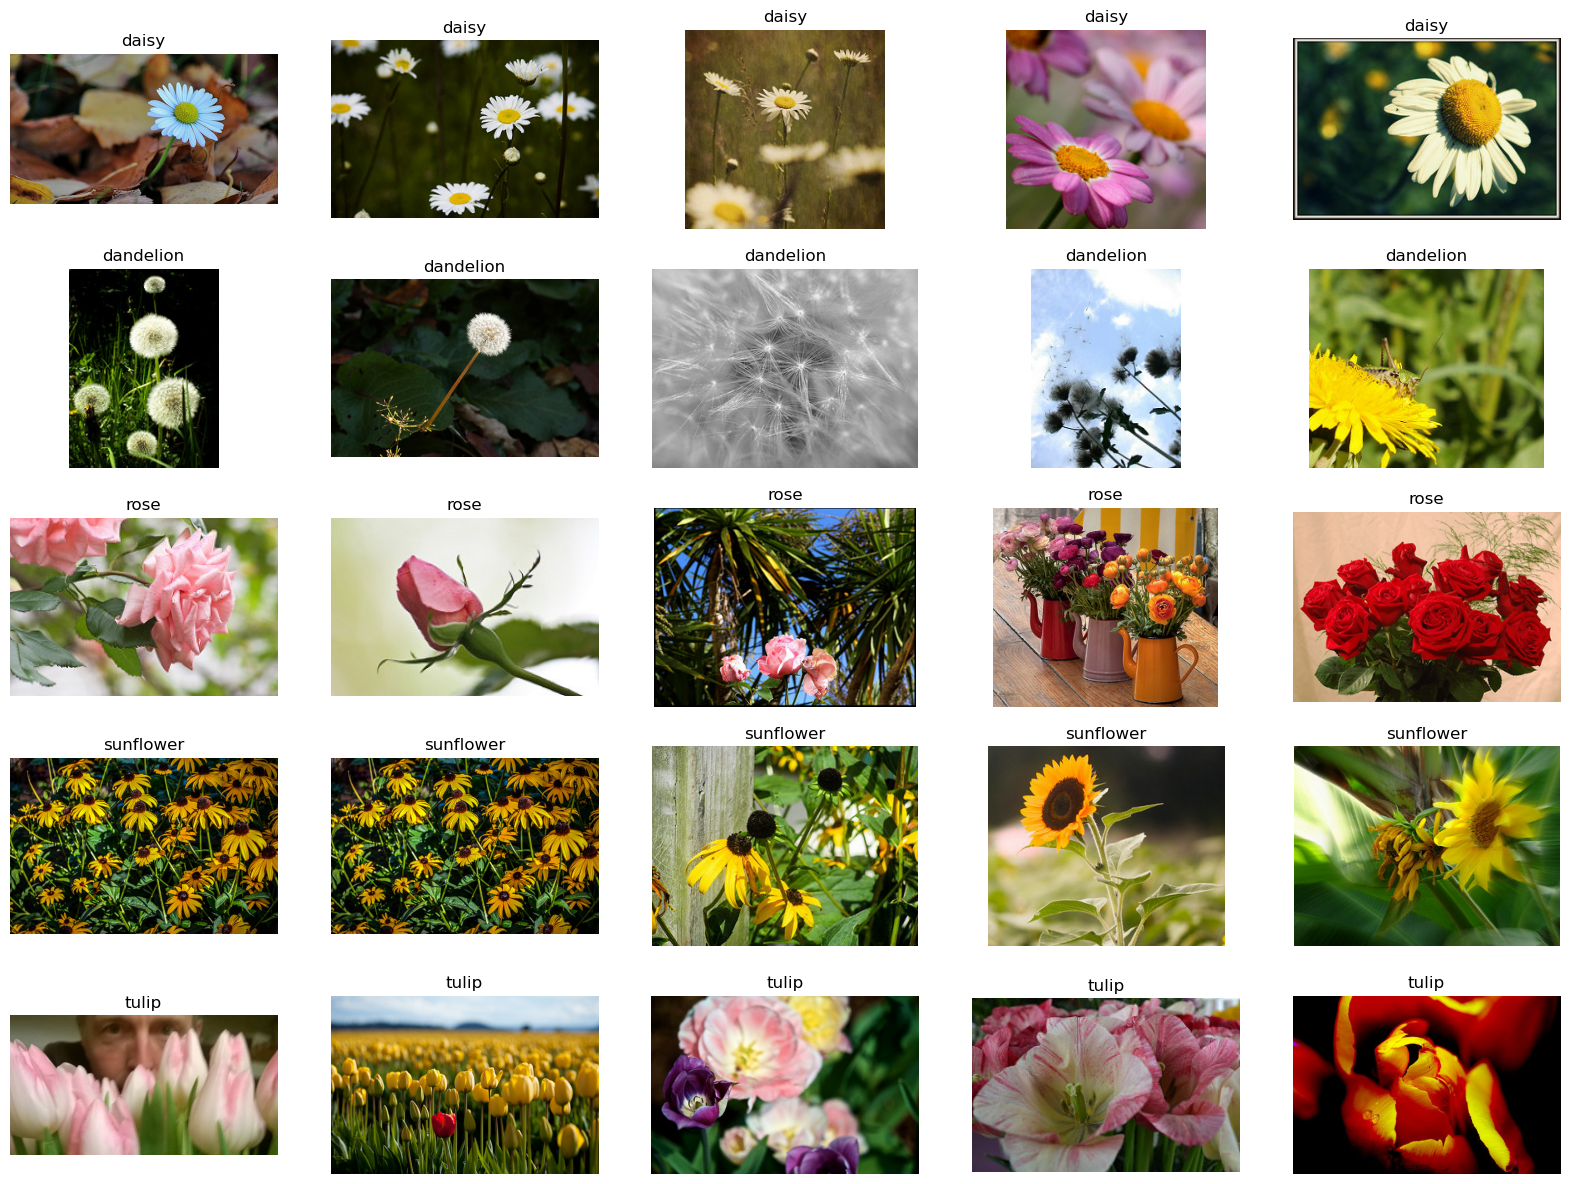

In [9]:
import os  # Importation du module 'os' pour interagir avec le système de fichiers.
import matplotlib.pyplot as plt  # Importation de 'matplotlib.pyplot' pour créer des visualisations (graphiques et images).
import seaborn as sns  # Importation de 'seaborn' pour des visualisations statistiques améliorées.
from PIL import Image  # Importation de 'PIL.Image' (Python Imaging Library) pour ouvrir et manipuler des fichiers d'image.
import random  # Importation du module 'random' pour sélectionner aléatoirement des éléments dans une liste.

# An empty list to store number of samples in each class
counts = []  # Création d'une liste vide pour stocker le nombre d'échantillons (fichiers) dans chaque classe.

for class_name in classes:  # Boucle sur chaque nom de classe dans la liste 'classes'.
    counts.append(len(os.listdir(os.path.join(base_dir, class_name))))  # Compte le nombre de fichiers dans chaque sous-répertoire (classe) et ajoute ce nombre à la liste 'counts'.

def display_samples(base_dir, classes, samples_per_class=5):  # Définition d'une fonction pour afficher des images échantillons de chaque classe.
    plt.figure(figsize=(20, 15))  # Création d'une nouvelle figure avec une taille de 20x15 pouces.
    for i, class_name in enumerate(classes):  # Boucle avec indexation sur chaque classe (i est l'index, class_name est le nom de la classe).
        class_dir = os.path.join(base_dir, class_name)  # Crée le chemin du répertoire pour chaque classe.
        image_files = os.listdir(class_dir)  # Liste tous les fichiers d'image dans le répertoire de la classe.
        for j in range(samples_per_class):  # Boucle pour sélectionner et afficher un nombre donné d'échantillons par classe (par défaut 5).
            image_path = os.path.join(class_dir, random.choice(image_files))  # Sélectionne aléatoirement un fichier d'image dans le répertoire de la classe.
            img = Image.open(image_path)  # Ouvre l'image sélectionnée avec PIL.
            plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)  # Crée une sous-figure pour afficher l'image dans une grille.
            plt.imshow(img)  # Affiche l'image dans la sous-figure.
            plt.title(class_name)  # Ajoute le titre de la classe (nom de la classe) au-dessus de l'image.
            plt.axis('off')  # Désactive les axes pour ne pas afficher les bordures autour des images.
    plt.show()  # Affiche toutes les images une fois la boucle terminée.

# Display 5 samples from each class
display_samples(base_dir, classes)  # Appelle la fonction pour afficher 5 images échantillons de chaque classe.


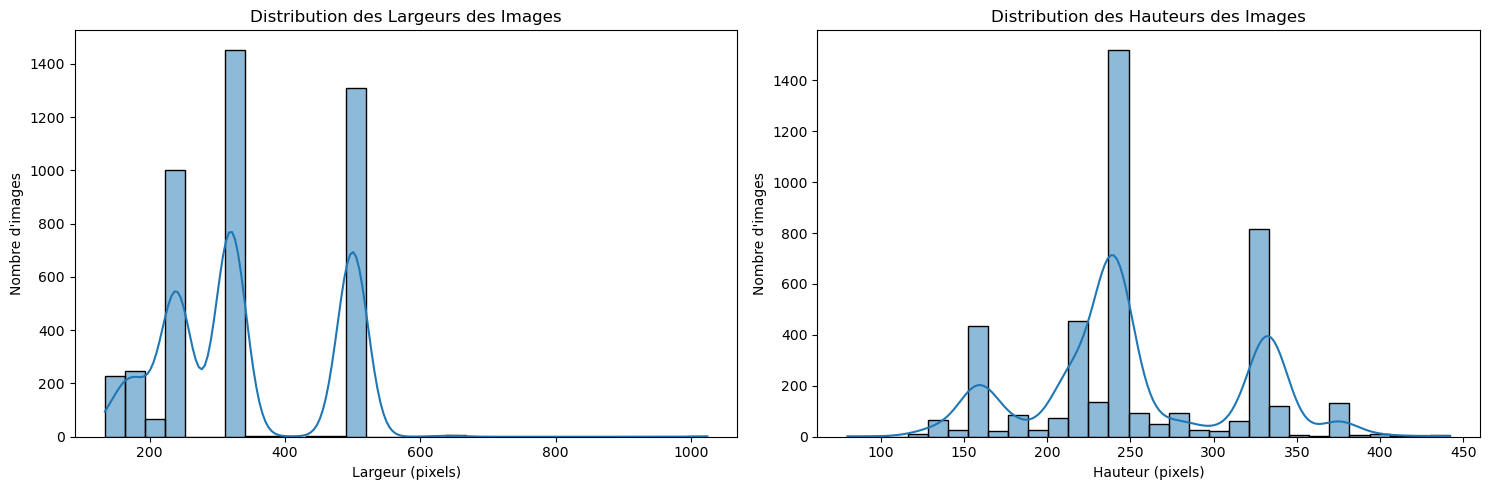

In [11]:
import os  # Importation du module 'os' pour interagir avec le système de fichiers.
from PIL import Image  # Importation de 'PIL.Image' (Python Imaging Library) pour ouvrir et manipuler des fichiers d'image.
import matplotlib.pyplot as plt  # Importation de 'matplotlib.pyplot' pour créer des graphiques et visualiser les données.
import seaborn as sns  # Importation de 'seaborn' pour des visualisations statistiques améliorées, notamment des graphiques avec KDE (Kernel Density Estimate).

image_sizes = []  # Création d'une liste vide pour stocker les dimensions (largeur, hauteur) de chaque image.

for class_name in classes:  # Boucle à travers chaque classe dans la liste 'classes'.
    class_dir = os.path.join(base_dir, class_name)  # Crée le chemin du répertoire correspondant à la classe.
    image_files = os.listdir(class_dir)  # Liste tous les fichiers d'images dans le répertoire de la classe.
    for image_file in image_files:  # Boucle sur chaque fichier d'image dans le répertoire de la classe.
        image_path = os.path.join(class_dir, image_file)  # Construit le chemin complet pour accéder au fichier d'image.
        with Image.open(image_path) as img:  # Ouvre l'image en utilisant 'PIL.Image' dans un bloc 'with' pour s'assurer qu'elle se ferme correctement après utilisation.
            image_sizes.append(img.size)  # Ajoute la taille de l'image (tuple de largeur et hauteur) à la liste 'image_sizes'.

widths, heights = zip(*image_sizes)  # Décompresse la liste 'image_sizes' en deux listes distinctes : 'widths' pour les largeurs et 'heights' pour les hauteurs.

plt.figure(figsize=(15, 5))  # Crée une nouvelle figure avec une taille de 15x5 pouces pour afficher deux sous-graphiques côte à côte.

plt.subplot(1, 2, 1)  # Crée le premier sous-graphe, avec 1 ligne et 2 colonnes, ciblant la première position.
sns.histplot(widths, bins=30, kde=True)  # Crée un histogramme des largeurs des images avec 30 intervalles (bins) et trace également une courbe KDE (estimation de densité par noyau).
plt.title('Distribution des Largeurs des Images')  # Ajoute un titre au graphique des largeurs.
plt.xlabel('Largeur (pixels)')  # Ajoute une étiquette pour l'axe x : "Largeur (pixels)".
plt.ylabel('Nombre d\'images')  # Ajoute une étiquette pour l'axe y : "Nombre d'images".

plt.subplot(1, 2, 2)  # Crée le deuxième sous-graphe, dans la deuxième position.
sns.histplot(heights, bins=30, kde=True)  # Crée un histogramme des hauteurs des images avec une courbe KDE.
plt.title('Distribution des Hauteurs des Images')  # Ajoute un titre au graphique des hauteurs.
plt.xlabel('Hauteur (pixels)')  # Ajoute une étiquette pour l'axe x : "Hauteur (pixels)".
plt.ylabel('Nombre d\'images')  # Ajoute une étiquette pour l'axe y : "Nombre d'images".

plt.tight_layout()  # Ajuste les espacements entre les sous-graphes pour éviter qu'ils ne se chevauchent.
plt.show()  # Affiche les graphiques.


In [13]:
import os
import numpy as np
from PIL import Image

base_dir = 'flowers'
processed_dir = 'flowers_processed'
target_size = (224, 224)  # Taille cible pour le redimensionnement

# Créez le répertoire traité s'il n'existe pas
if not os.path.exists(processed_dir):
    os.makedirs(processed_dir)
    for class_name in os.listdir(base_dir):
        os.makedirs(os.path.join(processed_dir, class_name))

# Fonction pour prétraiter les images
def preprocess_image(image_path, target_size):
    with Image.open(image_path) as img:
        # Redimensionner l'image
        img_resized = img.resize(target_size)
        # Normaliser l'image
        img_array = np.array(img_resized) / 255.0
        return img_array

# Boucle sur les classes et prétraiter chaque image
for class_name in os.listdir(base_dir):
    class_dir = os.path.join(base_dir, class_name)
    processed_class_dir = os.path.join(processed_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        processed_image = preprocess_image(image_path, target_size)
        processed_image_path = os.path.join(processed_class_dir, image_file)
        # Enregistrer l'image prétraitée
        Image.fromarray((processed_image * 255).astype(np.uint8)).save(processed_image_path)

print('Preprocessing completed.')


Preprocessing completed.


In [15]:

import os
from PIL import Image
# Fonction pour vérifier la taille des images
def check_image_sizes(directory, target_size):
    correct_size = True
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        for image_file in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_file)
            with Image.open(image_path) as img:
                if img.size != target_size:
                    print(f'Image {image_file} in class {class_name} has size {img.size}')
                    correct_size = False
    if correct_size:
        print(f'All images are of size {target_size}')

# Vérifier les tailles des images
check_image_sizes(processed_dir, target_size)

All images are of size (224, 224)


Normaliser les pixels des images pour que leurs valeurs soient comprises entre 0 et 1

In [17]:
import os
import shutil
import random

base_dir = 'flowers_processed'
train_dir = 'flowers_train'
val_dir = 'flowers_val'
test_dir = 'flowers_test'
split_ratios = (0.7, 0.15, 0.15)

# Fonction pour créer les répertoires
def create_dirs(base_output_dir, class_names):
    if not os.path.exists(base_output_dir):
        os.makedirs(base_output_dir)
        for class_name in class_names:
            os.makedirs(os.path.join(base_output_dir, class_name))

# Création des répertoires pour les ensembles d'entraînement, de validation, et de test
classes = os.listdir(base_dir)
create_dirs(train_dir, classes)
create_dirs(val_dir, classes)
create_dirs(test_dir, classes)

# Fonction pour diviser les fichiers
def split_dataset(base_dir, train_dir, val_dir, test_dir, split_ratios):
    for class_name in classes:
        class_dir = os.path.join(base_dir, class_name)
        files = os.listdir(class_dir)
        random.shuffle(files)
        
        train_split = int(len(files) * split_ratios[0])
        val_split = int(len(files) * (split_ratios[0] + split_ratios[1]))
        
        train_files = files[:train_split]
        val_files = files[train_split:val_split]
        test_files = files[val_split:]
        
        for file in train_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(train_dir, class_name, file))
        for file in val_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(val_dir, class_name, file))
        for file in test_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(test_dir, class_name, file))

# Diviser la dataset
split_dataset(base_dir, train_dir, val_dir, test_dir, split_ratios)

print('Dataset split completed.')


Dataset split completed.


In [3]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F

# Définir les transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Charger les datasets
train_dataset = datasets.ImageFolder('flowers_train', transform=transform)
val_dataset = datasets.ImageFolder('flowers_val', transform=transform)
test_dataset = datasets.ImageFolder('flowers_test', transform=transform)

# Créer les DataLoader avec une taille de lot réduite
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Définir le modèle CNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Vérifiez si un GPU est disponible et utilisez-le
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = SimpleCNN(num_classes=len(train_dataset.classes)).to(device)

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Définir les fonctions d'entraînement et de validation
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}%')

# Entraîner et valider le modèle
num_epochs = 10
for epoch in range(num_epochs):
    print(f'Starting epoch {epoch+1}')
    train_model(model, train_loader, criterion, optimizer, num_epochs=1)
    validate_model(model, val_loader, criterion)

# Évaluer le modèle sur l'ensemble de test
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total}%')

test_model(model, test_loader)


Starting epoch 1
Epoch [1/1], Loss: 1.936473934146447
Validation Loss: 1.2282142639160156, Accuracy: 50.416666666666664%
Starting epoch 2
Epoch [1/1], Loss: 1.1058432396834459
Validation Loss: 1.0191722881793976, Accuracy: 61.5%
Starting epoch 3
Epoch [1/1], Loss: 0.8374771008161994
Validation Loss: 0.7547469955682754, Accuracy: 74.16666666666667%
Starting epoch 4
Epoch [1/1], Loss: 0.5599331660726206
Validation Loss: 0.6229866075267394, Accuracy: 80.5%
Starting epoch 5
Epoch [1/1], Loss: 0.2695421099632494
Validation Loss: 0.6389576710760594, Accuracy: 83.66666666666667%
Starting epoch 6
Epoch [1/1], Loss: 0.13507624178541808
Validation Loss: 0.6269491080877682, Accuracy: 87.08333333333333%
Starting epoch 7
Epoch [1/1], Loss: 0.07490535221550977
Validation Loss: 0.6114944735666116, Accuracy: 86.91666666666667%
Starting epoch 8
Epoch [1/1], Loss: 0.0731254909111838
Validation Loss: 0.6570178044835726, Accuracy: 88.41666666666667%
Starting epoch 9
Epoch [1/1], Loss: 0.0435965132395116
V

In [5]:
class CNNWith3ConvLayers(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNWith3ConvLayers, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [7]:
class CNNWithDropout(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [9]:
class CNNWithMoreFC(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNWithMoreFC, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [11]:
# Vérifiez si un GPU est disponible et utilisez-le
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Choisir un des modèles
model = SimpleCNN(num_classes=len(train_dataset.classes)).to(device)  # Changez le modèle ici

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Définir les fonctions d'entraînement et de validation
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}%')

# Entraîner et valider le modèle
num_epochs = 10
for epoch in range(num_epochs):
    print(f'Starting epoch {epoch+1}')
    train_model(model, train_loader, criterion, optimizer, num_epochs=1)
    validate_model(model, val_loader, criterion)

# Évaluer le modèle sur l'ensemble de test
def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Test Accuracy: {100 * correct / total}%')

test_model(model, test_loader)


Starting epoch 1
Epoch [1/1], Loss: 2.1510522394645504
Validation Loss: 1.3176331734657287, Accuracy: 41.5%
Starting epoch 2
Epoch [1/1], Loss: 1.1876622620152264
Validation Loss: 0.8200195278724035, Accuracy: 70.83333333333333%
Starting epoch 3
Epoch [1/1], Loss: 0.6349191306446625
Validation Loss: 0.5399131427208582, Accuracy: 82.66666666666667%
Starting epoch 4
Epoch [1/1], Loss: 0.2602986347884303
Validation Loss: 0.5914840085866551, Accuracy: 86.91666666666667%
Starting epoch 5
Epoch [1/1], Loss: 0.12297862616927946
Validation Loss: 0.589779323382924, Accuracy: 87.0%
Starting epoch 6
Epoch [1/1], Loss: 0.06439515683663691
Validation Loss: 0.6584999794699251, Accuracy: 87.58333333333333%
Starting epoch 7
Epoch [1/1], Loss: 0.046271439495485095
Validation Loss: 0.7282249494556648, Accuracy: 87.33333333333333%
Starting epoch 8
Epoch [1/1], Loss: 0.03759680131031011
Validation Loss: 0.733874146193266, Accuracy: 87.75%
Starting epoch 9
Epoch [1/1], Loss: 0.0252943237487116
Validation L

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# SimpleCNN
class SimpleCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# CNNWithMoreFC
class CNNWithMoreFC(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNWithMoreFC, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# CNNWithDropout
class CNNWithDropout(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# CNNWith3ConvLayers
class CNNWith3ConvLayers(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNWith3ConvLayers, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [15]:
# Définir les transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Charger les datasets
train_dataset = datasets.ImageFolder('flowers_train', transform=transform)
val_dataset = datasets.ImageFolder('flowers_val', transform=transform)
test_dataset = datasets.ImageFolder('flowers_test', transform=transform)

# Créer les DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [17]:
# Configuration de l'appareil
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Définir les fonctions d'entraînement et de validation
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')
        validate_model(model, val_loader, criterion)

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}%')

# Fonction de test
def test_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f'Test Accuracy: {acc * 100}%')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    return acc, precision, recall, f1


In [19]:
# Hyperparamètres et configurations de modèle à expérimenter
configs = [
    {"model": SimpleCNN(num_classes=5), "name": "SimpleCNN"},
    {"model": CNNWithMoreFC(num_classes=5), "name": "CNNWithMoreFC"},
    {"model": CNNWithDropout(num_classes=5), "name": "CNNWithDropout"},
    {"model": CNNWith3ConvLayers(num_classes=5), "name": "CNNWith3ConvLayers"},
]

results = []

# Entraîner et évaluer chaque modèle
for config in configs:
    model = config["model"].to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    print(f"Training {config['name']}...")
    train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)
    
    print(f"Evaluating {config['name']}...")
    acc, precision, recall, f1 = test_model(model, test_loader)
    
    results.append({
        "Model": config["name"],
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convertir les résultats en DataFrame et afficher
results_df = pd.DataFrame(results)
print(results_df)


Training SimpleCNN...
Epoch [1/10], Loss: 2.667246110071012
Validation Loss: 1.14187049552014, Accuracy: 54.916666666666664%
Epoch [2/10], Loss: 1.0664053423617914
Validation Loss: 1.0004921273181313, Accuracy: 61.166666666666664%
Epoch [3/10], Loss: 0.9057999907470331
Validation Loss: 0.800650627989518, Accuracy: 69.75%
Epoch [4/10], Loss: 0.7240161025911812
Validation Loss: 0.7071514874696732, Accuracy: 73.58333333333333%
Epoch [5/10], Loss: 0.485003075827428
Validation Loss: 0.6441855894303635, Accuracy: 80.0%
Epoch [6/10], Loss: 0.26848283270752527
Validation Loss: 0.48894186847304044, Accuracy: 85.66666666666667%
Epoch [7/10], Loss: 0.11042146210566284
Validation Loss: 0.4982070056721568, Accuracy: 88.58333333333333%
Epoch [8/10], Loss: 0.04840486543253064
Validation Loss: 0.5961136413051894, Accuracy: 88.5%
Epoch [9/10], Loss: 0.04418082469014254
Validation Loss: 0.526137422378126, Accuracy: 89.0%
Epoch [10/10], Loss: 0.03423616270027388
Validation Loss: 0.6991602042199749, Accur

In [21]:
from torchvision import transforms

# Définir les transformations avec augmentation des données
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),  
    transforms.RandomRotation(10),      
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Charger les datasets avec les transformations d'augmentation
train_dataset = datasets.ImageFolder('flowers_train', transform=train_transform)
val_dataset = datasets.ImageFolder('flowers_val', transform=val_test_transform)
test_dataset = datasets.ImageFolder('flowers_test', transform=val_test_transform)

# Créer les DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [23]:
# Configuration de l'appareil
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Définir les fonctions d'entraînement et de validation
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')
        validate_model(model, val_loader, criterion)

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}%')

# Fonction de test
def test_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f'Test Accuracy: {acc * 100}%')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    return acc, precision, recall, f1


In [25]:
# Hyperparamètres et configurations de modèle à expérimenter
configs = [
    {"model": SimpleCNN(num_classes=5), "name": "SimpleCNN"},
    {"model": CNNWithMoreFC(num_classes=5), "name": "CNNWithMoreFC"},
    {"model": CNNWithDropout(num_classes=5), "name": "CNNWithDropout"},
    {"model": CNNWith3ConvLayers(num_classes=5), "name": "CNNWith3ConvLayers"},
]

results = []

# Entraîner et évaluer chaque modèle
for config in configs:
    model = config["model"].to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    print(f"Training {config['name']}...")
    train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)
    
    print(f"Evaluating {config['name']}...")
    acc, precision, recall, f1 = test_model(model, test_loader)
    
    results.append({
        "Model": config["name"],
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convertir les résultats en DataFrame et afficher
results_df = pd.DataFrame(results)
print(results_df)


Training SimpleCNN...
Epoch [1/10], Loss: 2.8609689619483016
Validation Loss: 1.6015248518241079, Accuracy: 22.416666666666668%
Epoch [2/10], Loss: 1.6004922419059566
Validation Loss: 1.5970743549497504, Accuracy: 24.833333333333332%
Epoch [3/10], Loss: 1.5984494812120267
Validation Loss: 1.5954297184944153, Accuracy: 24.75%
Epoch [4/10], Loss: 1.597471362206994
Validation Loss: 1.590870280014841, Accuracy: 28.0%
Epoch [5/10], Loss: 1.565317212081537
Validation Loss: 1.4640265326750905, Accuracy: 35.916666666666664%
Epoch [6/10], Loss: 1.4840958321966775
Validation Loss: 1.3938707960279364, Accuracy: 42.666666666666664%
Epoch [7/10], Loss: 1.4215716036354624
Validation Loss: 1.3597080927146108, Accuracy: 42.75%
Epoch [8/10], Loss: 1.36461451383141
Validation Loss: 1.2954056545307762, Accuracy: 48.25%
Epoch [9/10], Loss: 1.2829067968740695
Validation Loss: 1.1776978828405078, Accuracy: 54.25%
Epoch [10/10], Loss: 1.2245932710849172
Validation Loss: 1.134891815875706, Accuracy: 54.833333

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Charger le modèle VGG16 pré-entraîné
vgg16 = models.vgg16(pretrained=True)

# Remplacer la dernière couche fully-connected pour correspondre au nombre de classes de votre dataset
vgg16.classifier[6] = nn.Linear(4096, 5)

# Déplacer le modèle sur le GPU si disponible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16 = vgg16.to(device)


C:\Users\HP\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [10:44<00:00, 859kB/s]  


In [35]:
# Définir les fonctions d'entraînement et de validation
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')
        validate_model(model, val_loader, criterion)

def validate_model(model, val_loader, criterion):
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f'Validation Loss: {val_loss/len(val_loader)}, Accuracy: {100 * correct / total}%')


In [37]:
# Fonction de test
def test_model(model, test_loader):
    model.eval()
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    print(f'Test Accuracy: {acc * 100}%')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    return acc, precision, recall, f1


In [ ]:
# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.parameters(), lr=0.001)

# Entraîner le modèle VGG16
print("Training VGG16...")
train_model(vgg16, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Évaluer le modèle VGG16
print("Evaluating VGG16...")
vgg16_metrics = test_model(vgg16, test_loader)

# Stocker les résultats dans un DataFrame
results = []
results.append({
    "Model": "VGG16",
    "Accuracy": vgg16_metrics[0],
    "Precision": vgg16_metrics[1],
    "Recall": vgg16_metrics[2],
    "F1 Score": vgg16_metrics[3]
})

# Convertir les résultats en DataFrame et afficher
results_df = pd.DataFrame(results)
print(results_df)


Training VGG16...
Epoch [1/10], Loss: 1.6427086892166758
Validation Loss: 1.4101050025538395, Accuracy: 37.0%
Epoch [2/10], Loss: 1.4997648330238778
Validation Loss: 1.4850084781646729, Accuracy: 36.916666666666664%
Epoch [3/10], Loss: 1.4360497947630844
Validation Loss: 1.5025536057196165, Accuracy: 37.833333333333336%
Epoch [4/10], Loss: 1.3914065923148053
Validation Loss: 1.3443607907546193, Accuracy: 42.166666666666664%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import torch.nn.functional as F
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
import pandas as pd

# Définir les transformations sans augmentation des données
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Charger les datasets
train_dataset = datasets.ImageFolder('flowers_train', transform=transform)
val_dataset = datasets.ImageFolder('flowers_val', transform=transform)
test_dataset = datasets.ImageFolder('flowers_test', transform=transform)

# Créer les DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
class CNNWithMoreFC(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNWithMoreFC, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
